## Example of how to calculate the behavioural indicators of a metaheuristic, using this package

In [76]:
from behavioural_benchmark.indicators import MemoisedIndicators
import numpy as np
from math import floor
import matplotlib.pyplot as plt

In [2]:
k = MemoisedIndicators(path="example_data/")

Let's construct examples where we know the answers. 

For the regression based indicators, we can define graphs of two lines with set gradients. We can sample points along these lines, and save these to a file. Then later we can assert whether the regression indicators confirm the gradients we selected.

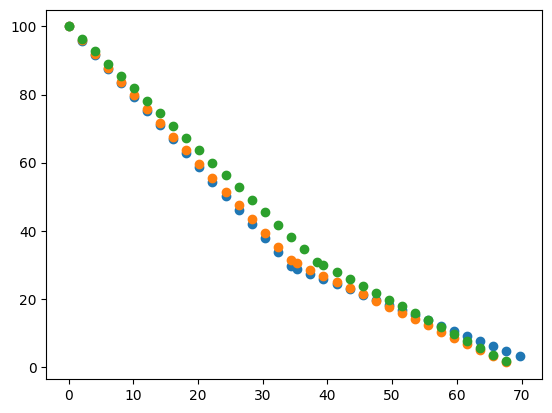

In [103]:
c = 100
x = np.linspace(0, 100-1, 50)

def sample_points(m_1, m_2):
    y_1 = m_1 * x + c
    c_2 = y_1[floor(0.70 * len(y_1[y_1 >= 0]))]
    x_1 = x[y_1 >= c_2]
    y_1 = y_1[y_1 >= c_2]

    y_2 = m_2 * (x_1 + 1) + c_2
    x_2 = x_1 + max(x_1) + 1
    x_2 = x_2[y_2 >= 0]
    y_2 = y_2[y_2 >= 0]
    
    return np.concat([x_1, x_2]), np.concat([y_1, y_2])

def save_to_file(xf, yf, filename):
    data = np.column_stack((xf, yf))
    np.savetxt(f"example_data/{filename}.csv", data, delimiter=",", header=f"iteration,{filename}", fmt="%.4f")


# diversity
diversity_gradient_1 = -2
diversity_gradient_2 = -0.9
diversity_x, diversity_y = sample_points(diversity_gradient_1, diversity_gradient_2)
save_to_file(diversity_x, diversity_y, "diversity")
    
# fitness
fitness_gradient_1 = -1.8
fitness_gradient_2 = -1.0
fitness_x, fitness_y = sample_points(fitness_gradient_1, fitness_gradient_2)
save_to_file(fitness_x, fitness_y, "fitness")

# distance
distance_gradient_1 = -2.05
distance_gradient_2 = -0.75
distance_x, distance_y = sample_points(distance_gradient_1, distance_gradient_2)
save_to_file(distance_x, distance_y, "distance")

plt.plot(distance_x, distance_y, 'o')
plt.plot(diversity_x, diversity_y, 'o')
plt.plot(fitness_x, fitness_y, 'o')
